Pandas Group By
In this tutorial we are going to look at weather data from various cities and see how group by can be used to run some analytics.

In [3]:
import pandas as pd
df = pd.read_csv("weather_by_cities.csv")
df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


For this dataset, get following answers,
1. What was the maximum temperature in each of these 3 cities?
2. What was the average windspeed in each of these 3 cities?

In [4]:
g = df.groupby("city")
g

In [5]:
for city, data in g:
    print("city:", city)
    print("/n")
    print("data:", data)

city: mumbai
/n
data:         day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
7  1/4/2017  mumbai           92          5   Rain
city: new york
/n
data:         day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
1  1/2/2017  new york           36          7  Sunny
2  1/3/2017  new york           28         12   Snow
3  1/4/2017  new york           33          7  Sunny
city: paris
/n
data:          day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy


This is similar to SQL,

SELECT * from weather_data GROUP BY city

In [6]:
g.get_group('mumbai')

,day,city,temperature,windspeed,event
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain


In [10]:
g.max()

,day,temperature,windspeed,event
city,,,,
mumbai,1/4/2017,92,15,Sunny
new york,1/4/2017,36,12,Sunny
paris,1/4/2017,54,20,Sunny


In [12]:
g.mean(numeric_only=True)

,temperature,windspeed
city,,
mumbai,88.50,9.25
new york,32.25,8.00
paris,47.75,12.75


In [13]:
g.min()

,day,temperature,windspeed,event
city,,,,
mumbai,1/1/2017,85,5,Fog
new york,1/1/2017,28,6,Rain
paris,1/1/2017,42,8,Cloudy


In [14]:
g.describe()

temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
mumbai           4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
mumbai         4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

In [15]:
g.size()

city
mumbai      4
new york    4
paris       4
dtype: int64

In [16]:
g.count()

,day,temperature,windspeed,event
city,,,,
mumbai,4,4,4,4
new york,4,4,4,4
paris,4,4,4,4


city
mumbai      Axes(0.125,0.11;0.775x0.77)
new york    Axes(0.125,0.11;0.775x0.77)
paris       Axes(0.125,0.11;0.775x0.77)
dtype: object

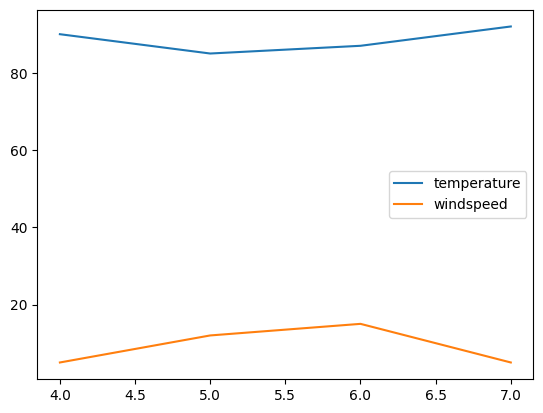

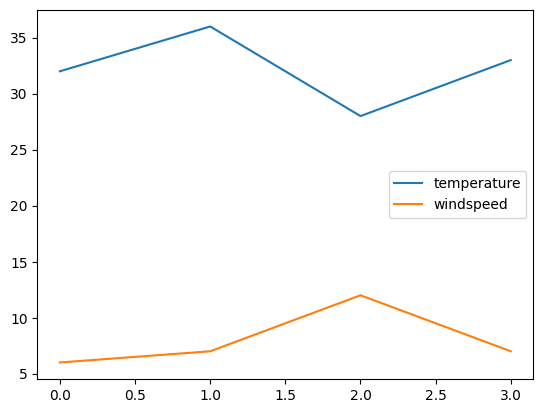

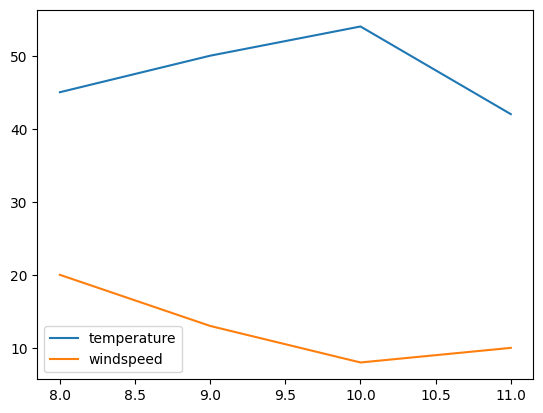

In [18]:
%matplotlib inline
g.plot()

Group data using custom function: Let's say you want to group your data using custom function. Here the requirement is to create three groups
Days when temperature was between 80 and 90
Days when it was between 50 and 60
Days when it was anything else
For this you need to write custom grouping function and pass that to groupby

In [19]:
def grouper(df, idx, col):
    if 80 <= df[col].loc[idx] <= 90:
        return '80-90'
    elif 50 <= df[col].loc[idx] <= 60:
        return '50-60'
    else:
        return 'others'

In [21]:
g = df.groupby(lambda x: grouper(df, x, 'temperature'))
g

In [22]:
for key, d in g:
    print("Group by Key: {}\n".format(key))
    print(d)

Group by Key: 50-60

         day   city  temperature  windspeed   event
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
Group by Key: 80-90

        day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
Group by Key: others

         day      city  temperature  windspeed   event
0   1/1/2017  new york           32          6    Rain
1   1/2/2017  new york           36          7   Sunny
2   1/3/2017  new york           28         12    Snow
3   1/4/2017  new york           33          7   Sunny
7   1/4/2017    mumbai           92          5    Rain
8   1/1/2017     paris           45         20   Sunny
11  1/4/2017     paris           42         10  Cloudy
